<a href="https://colab.research.google.com/github/eshaann/Sentiment-Analysis-NLP-Finance/blob/main/NLP_Finance_Eshaan_Nair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")
from torchtext.vocab import GloVe
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
import numpy
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import string


def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

PUNCTUATION = '!#$%&()*,-./:;<=>?@^_`{|}~'

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text

def pad_sequences_train(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_train['Sentence'].values)
  X_train = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_train

def pad_sequences_test(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_test['Sentence'].values)
  X_test = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_test

def run_model(X_train, y_train, X_test, y_test, epochs=5, max_sequence_length=256, max_nb_words=1000, embedding_dim=300):
  if any(x is None for x in [X_train, y_train, X_test, y_test, epochs, max_sequence_length, max_nb_words, embedding_dim]):
    print('Replace the None values above with your new values before calling the run_model() function.')
    return None, None, None
  model = Sequential()
  model.add(Embedding(max_nb_words+1, embedding_dim, mask_zero=True, input_length=max_sequence_length))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(n_labels, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  return model, history, test_accuracy


EMBEDDING_DIM = 300


nltk.download('wordnet')

# gdown.download('https://drive.google.com/uc?id=1q4U2gVY9tWEPdT6W-pdQpKmo152QqWLE', 'finance_train.csv', True)
# gdown.download('https://drive.google.com/uc?id=1nIBqAsItwVEGVayYTgvybz7HeK0asom0', 'finance_test.csv', True)

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

print ("Train & Test Files are loaded")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
--2022-05-22 21:58:59--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 64.233.188.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29264 (29K) [application/vnd.ms-excel]
Saving to: ‘finance_test.csv’

finance_test.csv    100%[===================>]  28.58K  --.-KB/s    in 0.001s  

2022-05-22 21:58:59 (29.2 MB/s) - ‘finance_test.csv’ saved [29264/29264]

--2022-05-22 21:58:59--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20

In [2]:

df_train = get_finance_train()
df_train.head()


,Sentence,Label
0,Autotank Group is part of Aspo 's Systems Divi...,1
1,"The contract includes design , construction , ...",1
2,Rapala said it estimates it will make savings ...,2
3,The share capital of Alma Media Corporation (b...,1
4,The financial impact is estimated to be some 1...,2


In [3]:

index = df_train.index
num_of_rows = len(index)
print(num_of_rows)


2037


In [4]:

df_test = get_finance_test()
df_test.head()


,Sentence,Label
0,"In the third quarter of 2010 , net sales incre...",2
1,Foundries division reports its sales increased...,2
2,Financing of the project will come mainly from...,1
3,"Sukhraj Dulai , of the 2900 block of Boni Sue ...",1
4,Finland 's leading metals group Outokumpu said...,2


In [5]:

index = df_test.index
print(len(index))


227


In [6]:
print(PUNCTUATION)

!#$%&()*,-./:;<=>?@^_`{|}~


In [7]:
sample_sentence = ".I went to the store and there was no iguanas,!" 

In [8]:
PUNCTUATION_RE = re.compile("[%s]" % PUNCTUATION) 

In [9]:

filtered_sample_sentence = PUNCTUATION_RE.sub("", sample_sentence)
print(filtered_sample_sentence)


I went to the store and there was no iguanas


In [10]:

clean_text(".DEEZ,Nuts!!")


'deez nuts'

In [11]:

train_example = df_train.iloc[99]["Sentence"]
clean_text(train_example)


'data processing unit collects data calculates rvr values provides data users via various interfaces'

In [12]:
#@title Run this cell to clean all the sentences in Finance Train and Finance Test.

df_train['Sentence'] = df_train['Sentence'].apply(clean_text)
df_test['Sentence'] = df_test['Sentence'].apply(clean_text)

In [13]:
MAX_SEQUENCE_LENGTH = 256

In [14]:
MAX_NB_WORDS = 1000

In [15]:

X_train = pad_sequences_train(df_train, df_test)
print(X_train)
print(X_train[0])


[[  0   0   0 ... 348  91 161]
 [  0   0   0 ... 285  93 485]
 [  0   0   0 ...  39 185 657]
 ...
 [  0   0   0 ...  32  11  16]
 [  0   0   0 ...  11  94  14]
 [  0   0   0 ... 911  33 218]]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 

In [16]:

X_test = pad_sequences_test(df_train, df_test)
print(X_test)


[[  0   0   0 ...   4   1   2]
 [  0   0   0 ...  32  11  31]
 [  0   0   0 ... 787 536 270]
 ...
 [  0   0   0 ...  25 957 364]
 [  0   0   0 ... 538 933  27]
 [  0   0   0 ...   2   1   2]]


In [17]:

y_train = pd.get_dummies(df_train["Label"]).values
print(y_train.shape)



(2037, 3)


In [18]:

y_test = pd.get_dummies(df_test["Label"]).values
print(y_test.shape)


(227, 3)


In [19]:
n_labels = 3
label_map = {0 : "negative", 
             1 : "neutral",
             2 : "positive"}

In [20]:


model = Sequential()
model.add(Embedding(MAX_NB_WORDS+1, EMBEDDING_DIM, mask_zero=True, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 300)          300300    
                                                                 
 spatial_dropout1d (SpatialD  (None, 256, 300)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 461,003
Trainable params: 461,003
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
epochs = 5 
batch_size = 64 

In [22]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
29/29 [==============================] - 47s 1s/step - loss: 0.9295 - accuracy: 0.6607 - val_loss: 0.6895 - val_accuracy: 0.7549
Epoch 2/5
29/29 [==============================] - 34s 1s/step - loss: 0.5613 - accuracy: 0.7747 - val_loss: 0.5713 - val_accuracy: 0.8137
Epoch 3/5
29/29 [==============================] - 34s 1s/step - loss: 0.3976 - accuracy: 0.8554 - val_loss: 0.5019 - val_accuracy: 0.8284
Epoch 4/5
29/29 [==============================] - 33s 1s/step - loss: 0.2588 - accuracy: 0.9154 - val_loss: 0.5036 - val_accuracy: 0.8186
Epoch 5/5
29/29 [==============================] - 35s 1s/step - loss: 0.1818 - accuracy: 0.9471 - val_loss: 0.5321 - val_accuracy: 0.8137


In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(test_loss, test_accuracy) 

8/8 [==============================] - 1s 108ms/step - loss: 0.5247 - accuracy: 0.8370
0.5247048735618591 0.8370044231414795


In [24]:
training_loss = history.history["loss"];

In [25]:
validation_loss = history.history["val_loss"] 

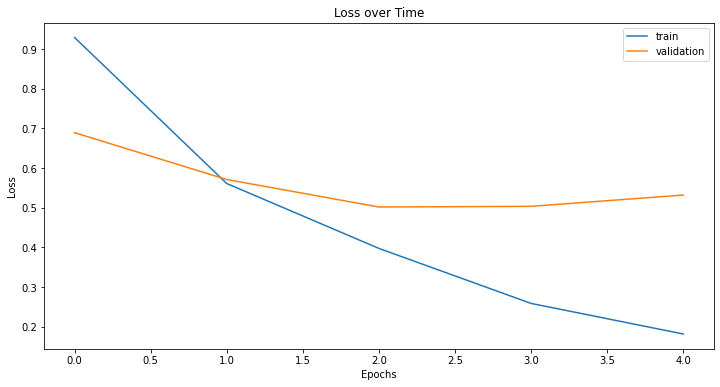

In [26]:
fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.plot(training_loss, label="train")
plt.plot(validation_loss, label="validation")


plt.legend()
plt.show()

In [27]:
training_accuracy = history.history["accuracy"] 
validation_accuracy = history.history["val_accuracy"] 

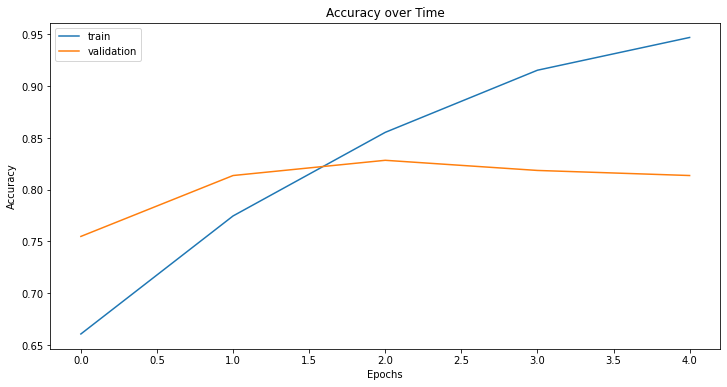

In [28]:
fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.plot(training_accuracy, label="train")
plt.plot(validation_accuracy, label="validation")


plt.legend()
plt.show()

In [29]:
model, history, test_acc = run_model(
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test, 
    epochs=10, 
    max_sequence_length=256, 
    max_nb_words=1000, 
    embedding_dim=300 
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 300)          300300    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 256, 300)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 461,003
Trainable params: 461,003
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
29/29 [==============================] - 37s 1s/step - loss: 0.9244 - accuracy: 0.6525 - val_loss: